In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!unzip '/content/drive/My Drive/Dataset/PetImages.zip' -d '/dataset'

Archive:  /content/drive/My Drive/Dataset/PetImages.zip
replace /dataset/Cat/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import sys
import os
import numpy as np
from PIL import Image
import string
import matplotlib.pyplot as plt


from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras import regularizers
DATA_DIR = '/dataset'


In [4]:
def preprocessing():
  datagen = ImageDataGenerator(
      rescale=1./255,
      # rotation_range=40,
      # width_shift_range=0.2,
      # height_shift_range=0.2,
      # shear_range=0.2,
      # zoom_range=0.2,
      # horizontal_flip=True,
      # fill_mode='nearest',
      validation_split=0.2
  )

  train_generator = datagen.flow_from_directory(
      DATA_DIR,
      target_size=(150,150),
      batch_size=64,
      class_mode='binary',
      subset='training'
  )

  validation_generator = datagen.flow_from_directory(
      DATA_DIR,
      target_size=(150,150),
      batch_size=64,
      class_mode='binary',
      subset='validation'
  )

  return train_generator, validation_generator

In [5]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs is None:
      logs = {}
    if logs.get('val_accuracy') >= 0.95:
      print(f'Epoch {epoch}: Reached accuracy threshold')
      self.model.stop_training = True

In [6]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        # tf.keras.layers.Dense(4096, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Dense(2048, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Dense(1024, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Dense(512, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Dense(256, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [16]:
def train():
  train_generator, validation_generator = preprocessing()

  callback = mycallback()

  model = create_model()

  history = model.fit(train_generator,
                      epochs=100,
                      batch_size=64,
                      verbose=1,
                      # callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2), callback],
                      callbacks=[callback],
                      validation_data=validation_generator)

  return model, history

In [19]:
model, history = train()

Found 19998 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Epoch 1/100
  6/313 [..............................] - ETA: 26s - loss: 1.3903 - accuracy: 0.4688

313/313 [==============================] - 50s 154ms/step - loss: 0.7119 - accuracy: 0.6187 - val_loss: 0.6158 - val_accuracy: 0.6949
Epoch 2/100
313/313 [==============================] - 49s 157ms/step - loss: 0.5895 - accuracy: 0.7137 - val_loss: 0.5592 - val_accuracy: 0.7287
Epoch 3/100
313/313 [==============================] - 49s 155ms/step - loss: 0.5391 - accuracy: 0.7454 - val_loss: 0.5049 - val_accuracy: 0.7747
Epoch 4/100
313/313 [==============================] - 51s 162ms/step - loss: 0.4942 - accuracy: 0.7770 - val_loss: 0.4718 - val_accuracy: 0.7933
Epoch 5/100
313/313 [==============================] - 48s 153ms/step - loss: 0.4649 - accuracy: 0.7940 - val_loss: 0.4630 - val_accuracy: 0.7951
Epoch 6/100
313/313 [==============================] - 48s 154ms/step - loss: 0.4426 - accuracy: 0.8076 - val_loss: 0.4532 - val_accuracy: 0.8005
Epoch 7/100
313/313 [==============================] - 49s 155ms/step - loss: 0.4235 - accuracy: 0.8191 - val_loss: 0.4298 - val_accurac

In [9]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
def visualization(accuracy, val_accuracy, loss, val_loss):
    epochs = range(len(accuracy))

    fig, axes = plt.subplots(2, 1, figsize=(6, 6))

    axes[0].plot(epochs, accuracy, 'r', label='Training accuracy')
    axes[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    axes[0].set_title('Train and validation accuracy')
    axes[0].legend()

    axes[1].plot(epochs, loss, 'r', label='Training loss')
    axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axes[1].set_title('Train and validation loss')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

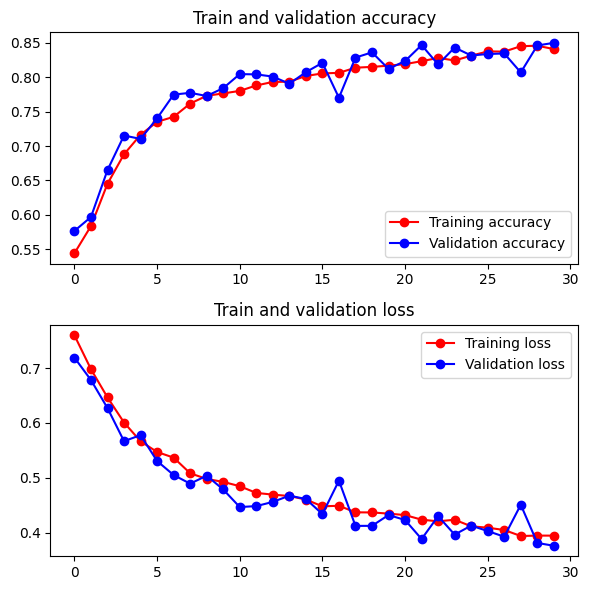

In [26]:
visualization(accuracy, val_accuracy, loss, val_loss)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 36, 36, 64)       

Params = (kích thước filter x kích thước filter x số lượng đầu vào + 1) x số lượng filter, với 1 * số lượng filter = số lượng bias
1.   conv2d_6: (3 x 3 x 3 + 1) * 32 = 896
2.   conv2d_7: (3 x 3 x 32 + 1) * 64 = 18496
3.   conv2d_8: (3 x 3 x 64 + 1) * 128 = 73856
4.   dense_4: (36992 + 1) * 128 = 4735103
5.   dense_5: (128 + 1) * 1 = 129


